In [5]:
# Draw, Store, Intersection - isolate DEMs and soil polygons - Intersection based on DEMs
# Ensure Soil and Slope data conform to same projection
# May convert raster to TIN - create compatibility between vector-converted DEM and vector-format soil shapefile 
# Potentially Convert DEM to TIF

import geopandas as gpd
import rasterio 

# Check projections of NM Slope DEM and NM Soil Polygons...
#...

# Create dataframe
#dem = gpd.GeoDataFrame()
#soil = gpd.GeoDataFrame()

# Draw, Store, Process DEM for slope


# Convert DEM to TIN? NO

#dem = rasterio.open(r'')
soil = gpd.read_file(r'C:\Users\casca\Downloads\SimpleAccess\kx-new-mexico-soils-SHP\new-mexico-soils.shp')
#soil.head(16)

# select_soil will be used in intersection with slope selection
select_soil = soil.loc[soil['MUSYM']=='Bn','geometry']
select_soil.head(10)

In [ ]:
# Intersection between DEM and Soil Polygons
# Expect to have file that combines columns of slopes and soil

DandS_inst = gpd.overlay(dem, soil, how= 'intersection')

In [ ]:
# Overlay via iloc and boolean operation - 0 to 5 degrees and "soft" soil
# Expect to produce polyons indicating combination of low slopes (in degrees), and "soft" soil

select_DS_inst = DandS_inst[slope>0 and slope<10 and soil = '']

In [ ]:
# Calculate area and compare to minimum area needed for FSSP.  Create buffer to represent FSSP. 
# Option: find center of polygon and calculate distance to nearest road
select_DS_inst['area']=select_DS_inst.area

In [ ]:
# Select area equal to or greater than the 
#total area of an American football field is 57,600 square feet (5,350 m2).....


In [ ]:
### Draft Area Below ###

In [6]:
# Calculate slope from DEM

import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt


tif_otero = rasterio.open(r'C:\Users\casca\Downloads\SimpleAccess\NMslope\33105-C7.dem')

In [7]:
tif_otero

<open DatasetReader name='C:\Users\casca\Downloads\SimpleAccess\NMslope\33105-C7.dem' mode='r'>

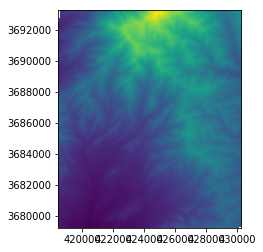

In [8]:
#tif_otero.read(1)
show(tif_otero)

In [30]:
from osgeo import gdal
import numpy as np
import rasterio

def calculate_slope(DEM):
    gdal.DEMProcessing('C:/Users/casca/Downloads/SimpleAccess/slope.tif', DEM, 'slope')
    with rasterio.open('C:/Users/casca/Downloads/SimpleAccess/slope.tif') as dataset:
        slope=dataset.read(1)
    return slope

#def calculate_aspect(DEM):
#    gdal.DEMProcessing('aspect.tif', DEM, 'aspect')
#    with rasterio.open('aspect.tif') as dataset:
#        aspect=dataset.read(1)
#    return aspect

slope=calculate_slope(r'C:\Users\casca\Downloads\SimpleAccess\NMslope\33105-C7.dem')
#aspect=calculate_aspect('DEM.tif')

print(type(slope))
#print(slope.dtype)
#print(slope.shape)

#otero_datashadow  = gdal.OpenEx(tif_otero, gdal.OF_RASTER )
#gdal.DEMProcessing('C:\Users\casca\Downloads\SimpleAccess\slope.tif', otero_datashadow, 'slope')

<type 'numpy.ndarray'>


In [31]:
print slope

[[-9999. -9999. -9999. ..., -9999. -9999. -9999.]
 [-9999. -9999. -9999. ..., -9999. -9999. -9999.]
 [-9999. -9999. -9999. ..., -9999. -9999. -9999.]
 ..., 
 [-9999. -9999. -9999. ..., -9999. -9999. -9999.]
 [-9999. -9999. -9999. ..., -9999. -9999. -9999.]
 [-9999. -9999. -9999. ..., -9999. -9999. -9999.]]


In [32]:
slope[slope==-9999]=0

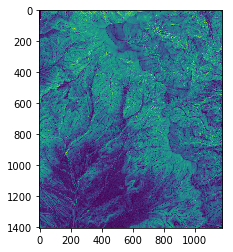

1403

In [41]:
from rasterio.plot import show
show(slope)
len(slope)

In [46]:
###  https://rasterio.readthedocs.io/en/stable/topics/features.html ###
###  This is the raster-to-polygon method suggestsed by Professor Gong since April 25

import pprint
import rasterio
from rasterio import features

### 3 is chosen, because it's associated with blue band
### 55 is pixel color wanted, because it is associated with the angle 10 degrees.  Since the raster was turned into pixels,
### I thought that the bands were replaced with pixel values, ranging from 0 to 255

with rasterio.open(slope) as src:
    darker = src.read(55)   
    
mask = blue != 255
shapes = features.shapes(darker, mask=mask)
pprint.pprint(next(shapes))

### Results in error.  The error claims that it's unable to process the array due to the file or path

### Below is result of sample from website
# Output
# pprint.pprint(next(shapes))
# ({'coordinates': [[(71.0, 6.0),
#                    (71.0, 7.0),
#                    (72.0, 7.0),
#                    (72.0, 6.0),
#                    (71.0, 6.0)]],
#   'type': 'Polygon'},
# 253)

TypeError: invalid path or file: array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [43]:
### Unable to insert NaN as before, and unable to count bands through .count

import numpy as nan
slope[slope>10]=NaN
slope.count

NameError: name 'NaN' is not defined

In [35]:
slope10deg = slope[slope<=10]

In [40]:
len(slope10deg)

343052

In [ ]:
### Using polygonize alternative to convert raster SLOPE into polygon

from osgeo import gdal, ogr

from osgeo import ogr, gdal, osr
from osgeo.gdalnumeric import *  
from osgeo.gdalconst import * 
import fiona
from shapely.geometry import shape
import rasterio.features


#slopepoly = 'C:/Users/casca/Downloads/SimpleAccess/slope_poly.shp'

# OR
#
#  create output datasource
#
#dst_layername = "POLYGONIZED_STUFF"
#drv = ogr.GetDriverByName("ESRI Shapefile")
#dst_ds = drv.CreateDataSource( dst_layername + ".shp" )
#dst_layer = dst_ds.CreateLayer(dst_layername, srs = None )
#gdal.Polygonize(slope10deg, None, slopepoly, 0,[], callback=None)

mypoly=[]
for vec in rasterio.features.shapes(slope):
    mypoly.append(shape(vec))

In [ ]:
mypoly

In [72]:
NMslope = gdal.Open(r'C:\Users\casca\Downloads\SimpleAccess\NMslope\33105-C7.dem')

NMsloped = gdal.DEMProcessing('', r'C:\Users\casca\Downloads\SimpleAccess\NMslope\33105-C7.dem', 'slope')

In [83]:
#show(NMsloped)

In [ ]:
# create Geodataframe for Slope?  Use "Read Raster Pixels"? ...variable[int(row), int(col)]

slope_convert[Geometry] = gpd.GeoDataframe(slope) 

# Or slope.index(x_coord,y_coord)
#   return row, col



#DandS_inst = gpd.overlay(slope_convert, soil, how= 'intersection')

In [45]:
###  https://rasterio.readthedocs.io/en/stable/topics/features.html ###
###  This is the raster-to-polygon method suggestsed by Professor Gong since April 25

import pprint
import rasterio
from rasterio import features

### 3 is chosen, because it's associated with blue band
### 55 is pixel color wanted, because it is associated with the angle 10 degrees 

with rasterio.open(slope) as src:
    darker = src.read(55)   
    
mask = blue != 255
shapes = features.shapes(darker, mask=mask)
pprint.pprint(next(shapes))

# Output
# pprint.pprint(next(shapes))
# ({'coordinates': [[(71.0, 6.0),
#                    (71.0, 7.0),
#                    (72.0, 7.0),
#                    (72.0, 6.0),
#                    (71.0, 6.0)]],
#   'type': 'Polygon'},
# 253)

TypeError: invalid path or file: array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

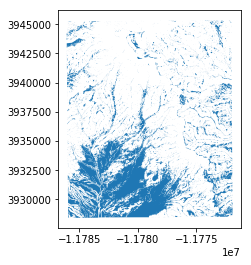

In [27]:
import geopandas as gpd
import rasterio 
import matplotlib.pyplot as plt
%matplotlib inline

#slope0_10 = gpd.read_file(r'C:\Users\casca\Downloads\SimpleAccess\SimplyPoly\CpSlpCounty_SimpPoly.shp')
#consider using the "Simplified Polygon" version of above .shp
soil = gpd.read_file(r'C:\Users\casca\Downloads\SimpleAccess\SoilClipTOslp\SoilCPtoSLP.shp')


#slope_select = slope.iloc[:,1]
#print slope_select

#slope0_10.head()
#slope0_10.plot()
soil.plot()

Shape_Leng AREASYMBOL MUSYM  SPATIALVER  MUKEY  \
3   10391.309154      NM636    GA         3.0  56665   
56   8123.766021      NM636    GA         3.0  56665   
72   3065.123386      NM636    GA         3.0  56665   

                                             geometry  
3   (POLYGON ((-11783599.5917 3928552.979699999, -...  
56  (POLYGON ((-11773511.54544378 3930690.58941511...  
72  (POLYGON ((-11784706.6789 3928712.574900001, -...

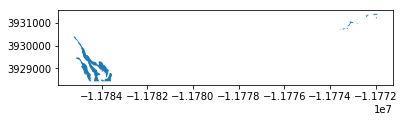

In [8]:
soiltype = soil.loc[soil['MUSYM']=='GA',:]
soiltype.plot()
soiltype.head()

In [ ]:
SLPandSoil_inter = gpd.overlay(soiltype, slope0_10, how= 'intersection')
#SLPandSoil_inter
ax = SLPandSoil_inter.plot(cmap='tab10')
soiltype.plot(ax=ax, facecolor='none', edgecolor='k');
slope0_10.plot(ax=ax, facecolor='none', edgecolor='k');

In [24]:
# Make a selection that contains only the first five rows
selection = soiltype[:]

# Iterate over rows and print the area of a Polygon
for index, row in selection.iterrows():
    # Get the area of the polygon
    poly_area = row['geometry'].area
    # Print information for the user
    print("Soil area (in sq ft) at area {index} is: {area:.3f}".format(index=index, area=poly_area))
    if poly_area > 7100:
        print ("Area is large enough to accommodate Fuel Station")

Soil area (in sq ft) at area 3 is: 531037.109
Area is large enough to accommodate Fuel Station
Soil area (in sq ft) at area 56 is: 38295.415
Area is large enough to accommodate Fuel Station
Soil area (in sq ft) at area 72 is: 163842.845
Area is large enough to accommodate Fuel Station


In [7]:

###OPTIONAL###
SLPandSoil_inter = gpd.overlay(soiltype, slope0_10, how= 'intersection')
#SLPandSoil_inter
ax = SLPandSoil_inter.plot(cmap='tab10')
soiltype.plot(ax=ax, facecolor='none', edgecolor='k');
slope0_10.plot(ax=ax, facecolor='none', edgecolor='k');

###OPTIONAL###
# Make a selection that contains only the first five rows
selection = soiltype[0:5]

# Iterate over rows and print the area of a Polygon
for index, row in selection.iterrows():
    # Get the area of the polygon
    poly_cent = row['geometry'].centroid
    # Print information for the user
    
    print("Polygon center at index {index} is: {centroid}".format(index=index, centroid=poly_cent))

Polygon center at index 3 is: POINT (-11784247.20457901 3929086.613463473)
Polygon center at index 56 is: POINT (-11772734.01337041 3931073.498297384)
Polygon center at index 72 is: POINT (-11784709.64956888 3928937.825512032)


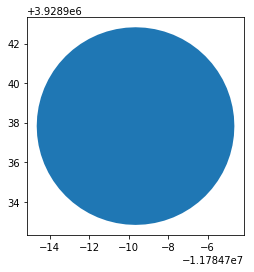

In [20]:
###OPTIONAL###
#Create square buffer representing FSSP area, and is centered on the above centroids
#53 yds by 120 yds, 7100.28 square feet, radius 60 ft

from shapely.geometry import Point

pointA = Point(-11784247.20457901, 3929086.613463473)
pointB = Point(-11772734.01337041, 3931073.498297384)
pointC = Point(-11784709.64956888, 3928937.825512032)

FuelAreaA = pointA.buffer(5)
FuelAreaB = pointB.buffer(5)
FuelAreaC = pointC.buffer(5)

FuelArea_Soil = soiltype['geometry'].intersection(FuelAreaC)
FuelArea_Soil.plot()